# Example Usage

Examples of how to use the API.

In [ ]:
from pandas import DataFrame

DataFrame(
    [
        {
            "round1": 3.5,
            "round2": 2.3,
            "round3": 2.8,
            "round4": 3.200000000000001,
            "round5": 2.6999999999999993,
            "round6": 2.5,
            "round7": 4.100000000000001,
        }
    ]
)

,round1,round2,round3,round4,round5,round6,round7
0,3.5,2.3,2.8,3.2,2.7,2.5,4.1


In [ ]:
import kml2geojson

# from shinywidgets import render_widget
import requests
from geopandas as GeoDataFrame
from io import StringIO

from ipyleaflet import Map, Marker, GeoData, GeoJSON


def kml_url_to_json(kml_url):
    text = StringIO(requests.get(kml_url).text)
    return kml2geojson.main.convert(text)

#kenya_2025
kmlurl = "https://webapps2.wrc.com/2020/web/live/kml/montecarlo_2025.xml"
boundaries = kml_url_to_json(kmlurl)
gdf = GeoDataFrame(boundaries)
map = Map(center=(50.6252978589571, 0.34580993652344), zoom=3)
geo_json = GeoJSON(data=boundaries[0])
map.add_layer(geo_json)

# point = Marker(location=(52.204793, 0.121558), draggable=False)
# map.add_layer(point)
map

Map(center=[50.6252978589571, 0.34580993652344], controls=(ZoomControl(options=['position', 'zoom_in_text', 'z…

In [1]:
from wrc_rallydj.livetiming_api import WRCLiveTimingAPIClient, time_to_seconds

# The cacheing is tricky:
# - we want to be able to force updates for live stages etc
# There is internal state in the class, which stores
# the last requested data unless we force an update
# wrc = WRCLiveTimingAPIClient(use_cache=True, backend="sqlite", expire_after=600)
wrc = WRCLiveTimingAPIClient(use_cache=True, backend="memory", expire_after=600)

# wrc.initialise(year=2024)
# wrc.seasonId
# Current year, latest race by default
wrc.initialise()

In [2]:
cal=wrc.getFullCalendar()
cal.tail()

,id,guid,title,location,startDate,endDate,eventId,rallyId,description,round,...,uid,seriesUid,releaseYear,availableOn,availableTill,startDateLocal,endDateLocal,finishDate,championship,championshipLogo
9,nMcx,WRC_2025_10,WRC Rally del Paraguay,Paraguay,1756386000000,1756670400000,549,597,Welcome to the 2025 WRC calendar! Rally del Pa...,10,...,nMcx,WRC_2025_10,2025,1756386000000,1756670400000,2025-08-28T09:00:00-04:00,2025-08-31T16:00:00-04:00,1756670400000,WRC,[{'url': 'https://wrc-static.enhance.diagnal.c...
10,XpJ0,WRC_2025_11,WRC Rally Chile Bio Bío,Concepcion,1757592000000,1757876400000,551,599,"Based in Concepción, Chile's second-largest ci...",11,...,XpJ0,WRC_2025_11,2025,1757592000000,1757876400000,2025-09-11T09:00:00-03:00,2025-09-14T16:00:00-03:00,1757876400000,WRC,[{'url': 'https://wrc-static.enhance.diagnal.c...
11,nQmX,WRC_2025_12,WRC Central European Rally,"Bad Griesbach, Bavaria",1760599800000,1760880600000,553,601,Rallying in three countries! From the scenic a...,12,...,nQmX,WRC_2025_12,2025,1760599800000,1760880600000,2025-10-16T09:30:00+02:00,2025-10-19T15:30:00+02:00,1760880600000,WRC,[{'url': 'https://wrc-static.enhance.diagnal.c...
12,CMXn,WRC_2025_13,WRC FORUM8 Rally Japan,Nagoya,1762387200000,1762671600000,554,602,"FORUM8 Rally Japan - the home of 2022, 2023 an...",13,...,CMXn,WRC_2025_13,2025,1762387200000,1762671600000,2025-11-06T09:00:00+09:00,2025-11-09T16:00:00+09:00,1762671600000,WRC,[{'url': 'https://wrc-static.enhance.diagnal.c...
13,WxyZ,WRC_2025_14,WRC Rally Saudi Arabia,Saudi Arabia,1764223200000,1764507600000,555,603,The 2025 WRC season concludes with the highly-...,14,...,WxyZ,WRC_2025_14,2025,1764223200000,1764507600000,2025-11-27T09:00:00+03:00,2025-11-30T16:00:00+03:00,1764507600000,WRC,[{'url': 'https://wrc-static.enhance.diagnal.c...


In [5]:
cal.columns

Index(['id', 'guid', 'title', 'location', 'startDate', 'endDate', 'eventId',
       'rallyId', 'description', 'round', 'cvpSeriesLink', 'sponsor', 'images',
       'season', 'competition', 'country', 'asset', '__typename', 'type',
       'uid', 'seriesUid', 'releaseYear', 'availableOn', 'availableTill',
       'startDateLocal', 'endDateLocal', 'finishDate', 'championship',
       'championshipLogo'],
      dtype='object')

In [6]:
wrc.getResultsCalendar().head(3)

,id,rallyTitle,ROUND,rallyCountry,rallyCountryImage,rallyId,date,startDate,finishDate,driverId,driverCountryImage,driver,coDriverId,coDriverCountryImage,coDriver,teamId,teamLogo,teamName,manufacturer,year
0,K1Lg,Rallye Monte-Carlo,1,Monaco,Flags/MCO.png,582,22 - 26 JAN 2025,1737558000000,1737898200000,1cf9ade6-25b5-5586-8393-eacfeb943eae,Flags/FRA.png,Sébastien OGIER,867cd58f-3fe3-5290-9cc5-b21cb41c523c,Flags/FRA.png,Vincent LANDAIS,be461a0c-d1fd-5052-a69c-3fd94f8cf5f6,Flags/toyota.png,TOYOTA GAZOO RACING WRT,Toyota,2025
1,skC3,WRC Rally Sweden,2,Sweden,Flags/SWE.png,583,13 - 16 FEB 2025,1739433600000,1739718000000,ae7329c9-79b3-5d96-886c-22cca6217764,Flags/GBR.png,Elfyn EVANS,53e56691-fe7c-5271-9dc5-8960df28b221,Flags/GBR.png,Scott MARTIN,be461a0c-d1fd-5052-a69c-3fd94f8cf5f6,Flags/toyota.png,TOYOTA GAZOO RACING WRT,Toyota,2025
2,G2NQ,WRC Safari Rally Kenya,3,Kenya,Flags/KEN.png,584,20 - 23 MAR 2025,1742450400000,1742734800000,,,,,,,,,,,2025


In [7]:
df_stageDetails = wrc.getStageDetails()
df_stageDetails.head()

,id,stageNo,STAGE TYPE,stageId,eventId,STATUS,day,name,distance
0,ee55daa1-fd07-574f-835a-f39008081b95,SHD,shakedown,SHD,535,Complete,,Shakedown,NaN
1,d560e801-c242-547b-baa1-881fcf11d8d1,SS1,SpecialStage,8330,535,Completed,Thursday,SS1 Umeå Sprint 1 (5.16km),5.16
2,7b3fc9fa-348b-5afd-a956-82aab0a68058,SS2,SpecialStage,8331,535,Completed,Friday,SS2 Bygdsiljum 1 (28.27km),28.27
3,4a48fad1-cd0e-59ac-b632-4613fb242f95,SS3,SpecialStage,8332,535,Completed,Friday,SS3 Andersvattnet 1 (20.51km),20.51
4,13100067-f837-5d2d-8a75-bba344f39f7f,SS4,SpecialStage,8333,535,Completed,Friday,SS4 Bäck 1 (10.8km),10.80


In [8]:
wrc.getItinerary()

,stage,eventId,stageId,distance,timingPrecision,firstCarDueDateTime,firstCarDueDateTimeMs,controlPenalties,status,type,location,targetDuration,targetDurationMs,id,order,date
0,TC0,535,null,,Minute,18:40,2025-02-13T18:40:00+01:00,All,Completed,TimeControl,Podium Red Barn Arena,null,null,1506.0,NaN,NaN
1,TC1,535,d560e801-c242-547b-baa1-881fcf11d8d1,4.97 km,Minute,19:00,2025-02-13T19:00:00+01:00,All,Completed,TimeControl,Umeå Sprint,00:20:00,1200000,1506.0,NaN,NaN
2,SS1,535,d560e801-c242-547b-baa1-881fcf11d8d1,5.16 km,Minute,19:05,2025-02-13T19:05:00+01:00,None,Completed,StageStart,Umeå Sprint 1,00:05:00,300000,1506.0,NaN,NaN
3,SF1,535,d560e801-c242-547b-baa1-881fcf11d8d1,,Tenth,,,None,Completed,FlyingFinish,Umeå Sprint 1,null,null,1506.0,NaN,NaN
4,TC1A,535,null,2.87 km,Minute,19:35,2025-02-13T19:35:00+01:00,Late,Completed,TimeControl,Parc Fermé Umeå IN,00:30:00,1800000,1506.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,TC17B,535,null,,Minute,11:55,2025-02-16T11:55:00+01:00,None,Completed,RegroupOut,"Regroup OUT, Red Barn",00:40:00,2400000,1509.0,4.0,Sunday 16th February
12,TC18,535,25563ecd-78cb-5261-b0ca-9019db8f043e,6.85 km,Minute,12:12,2025-02-16T12:12:00+01:00,All,Completed,TimeControl,Umeå,00:17:00,1020000,1509.0,4.0,Sunday 16th February
13,SS18,535,25563ecd-78cb-5261-b0ca-9019db8f043e,8.62 km,Minute,12:15,2025-02-16T12:15:00+01:00,None,Interrupted,StageStart,Umeå 2 (Power Stage),00:03:00,180000,1509.0,4.0,Sunday 16th February
14,SF18,535,25563ecd-78cb-5261-b0ca-9019db8f043e,,Thousandth,,,None,Interrupted,FlyingFinish,Umeå 2 (Power Stage),null,null,1509.0,4.0,Sunday 16th February


In [9]:
sl = wrc.getStartlist()
sl.head()

,order,startDateTimeLocal,carNo,driverId,driverCountry,driverCountryImage,driver,coDriverId,coDriverCountry,coDriverCountryImage,coDriver,teamId,team/car,teamName,teamLogo,eligibility,groupClass,priority,date,id
0,1,Entrylist,#1,c99a2a26-bd03-5153-aaa7-684d3acb5491,Belgium,Flags/BEL.png,Thierry NEUVILLE,b1b98699-0332-528a-8a80-11eb538f1ded,Belgium,Flags/BEL.png,Martijn WYDAEGHE,b6692ea5-df92-5cad-a91c-20319a6fffd7,i20 N Rally1,Hyundai,teamLogo/hyundai.png,M,RC1,P1,Entrylist,24c25e9d-7635-54c5-bc16-7fcf4bc7d60c
1,2,Entrylist,#33,ae7329c9-79b3-5d96-886c-22cca6217764,United Kingdom,Flags/GBR.png,Elfyn EVANS,53e56691-fe7c-5271-9dc5-8960df28b221,United Kingdom,Flags/GBR.png,Scott MARTIN,be461a0c-d1fd-5052-a69c-3fd94f8cf5f6,GR Yaris Rally1,Toyota,teamLogo/toyota.png,M,RC1,P1,Entrylist,24c25e9d-7635-54c5-bc16-7fcf4bc7d60c
2,3,Entrylist,#8,6632e7ca-34bf-55b8-9cad-d060000fa794,Estonia,Flags/EST.png,Ott TÄNAK,00a8a5c3-f7ba-5086-86df-1a59b7da7e26,Estonia,Flags/EST.png,Martin JÄRVEOJA,b6692ea5-df92-5cad-a91c-20319a6fffd7,i20 N Rally1,Hyundai,teamLogo/hyundai.png,M,RC1,P1,Entrylist,24c25e9d-7635-54c5-bc16-7fcf4bc7d60c
3,4,Entrylist,#16,bf956e8a-5cad-5327-add0-26e0481ea508,France,Flags/FRA.png,Adrien FOURMAUX,8231e16a-f455-56fa-9b3c-dc3befa854cf,France,Flags/FRA.png,Alexandre CORIA,b6692ea5-df92-5cad-a91c-20319a6fffd7,i20 N Rally1,Hyundai,teamLogo/hyundai.png,M,RC1,P1,Entrylist,24c25e9d-7635-54c5-bc16-7fcf4bc7d60c
4,5,Entrylist,#18,298f93b1-b0ef-5af4-9f0c-e468d29abfd2,Japan,Flags/JPN.png,Takamoto KATSUTA,6347a621-eade-5fff-a7b4-7c4b73651e8a,Ireland,Flags/IRL.png,Aaron JOHNSTON,be461a0c-d1fd-5052-a69c-3fd94f8cf5f6,GR Yaris Rally1,Toyota,teamLogo/toyota.png,M,RC1,P1,Entrylist,24c25e9d-7635-54c5-bc16-7fcf4bc7d60c


In [10]:
sl[["carNo", "driver"]].set_index("carNo")["driver"].str.split(" ").apply(
    lambda x: x[-1][:3]
).to_dict()

{'#1': 'NEU',
 '#33': 'EVA',
 '#8': 'TÄN',
 '#16': 'FOU',
 '#18': 'KAT',
 '#69': 'ROV',
 '#13': 'MUN',
 '#5': 'PAJ',
 '#22': 'SES',
 '#55': 'MCE',
 '#37': 'BER',
 '#9': 'SER',
 '#20': 'SOL',
 '#21': 'LIN',
 '#23': 'KOR',
 '#24': 'TID',
 '#25': 'HEI',
 '#26': 'JOO',
 '#27': 'ZAL',
 '#28': 'VIR',
 '#29': 'REI',
 '#30': 'JÜR',
 '#31': 'KOG',
 '#32': 'YAM',
 '#34': 'KAU',
 '#35': 'SOŁ',
 '#36': 'KOH',
 '#38': 'BRI',
 '#39': 'KOŁ',
 '#40': 'MAU',
 '#41': 'SOY',
 '#42': 'GRA',
 '#43': 'SOM',
 '#44': 'CHA',
 '#45': 'FON',
 '#46': 'VAT',
 '#47': 'MAT',
 '#48': 'GOT',
 '#49': 'LAS',
 '#50': 'GRA',
 '#51': 'VAS',
 '#52': 'ROY',
 '#53': 'MAR',
 '#54': 'TÜR',
 '#56': 'GIL',
 '#57': 'DOM',
 '#58': 'JOH',
 '#59': 'SMA',
 '#60': 'KEL',
 '#61': 'CHA',
 '#62': 'NÕG',
 '#63': 'MAR',
 '#64': 'KAZ',
 '#65': 'SCH',
 '#66': 'BAU',
 '#67': 'IIV',
 '#68': 'VIL',
 '#70': 'MAR',
 '#71': 'THO',
 '#72': 'RIB',
 '#73': 'POI',
 '#74': 'COV'}

In [12]:
wrc.stageId

In [11]:
stageId = "SHD"
# wrc.getOverall(stageId="SS1", update=True)
wrc.getOverall(stageId="SS5")

,id,pos,carNo,driverId,driverCountry,driverCountryImage,driver,coDriverId,coDriverCountry,coDriverCountryImage,...,diffPrev,groupClass,championshipId,totalTimeInS,timeToCarBehind,overallGap,overallDiff,eventId,rallyId,stageId
0,224e63c5-15c7-5acc-ae9e-7fb792d48be8,1,#18,298f93b1-b0ef-5af4-9f0c-e468d29abfd2,Japan,Flags/JPN.png,Takamoto KATSUTA,6347a621-eade-5fff-a7b4-7c4b73651e8a,Ireland,Flags/IRL.png,...,,RC1,289,2883.0,5.8,0.0,0.0,535,583,8334
1,f10e52a9-9d55-5689-8a1f-4aacfb6cd138,2,#33,ae7329c9-79b3-5d96-886c-22cca6217764,United Kingdom,Flags/GBR.png,Elfyn EVANS,53e56691-fe7c-5271-9dc5-8960df28b221,United Kingdom,Flags/GBR.png,...,+5.8,RC1,289,2888.8,3.9,5.8,5.8,535,583,8334
2,5517f3f3-bd8b-5ff1-9c60-10ff3468b60f,3,#8,6632e7ca-34bf-55b8-9cad-d060000fa794,Estonia,Flags/EST.png,Ott TÄNAK,00a8a5c3-f7ba-5086-86df-1a59b7da7e26,Estonia,Flags/EST.png,...,+3.9,RC1,289,2892.7,0.2,9.7,3.9,535,583,8334
3,31b422b0-813c-56a4-a2f1-4a88b6933364,4,#16,bf956e8a-5cad-5327-add0-26e0481ea508,France,Flags/FRA.png,Adrien FOURMAUX,8231e16a-f455-56fa-9b3c-dc3befa854cf,France,Flags/FRA.png,...,+0.2,RC1,289,2892.9,3.5,9.9,0.2,535,583,8334
4,d5d3b437-2bf3-5f68-8e57-954863ba0642,5,#1,c99a2a26-bd03-5153-aaa7-684d3acb5491,Belgium,Flags/BEL.png,Thierry NEUVILLE,b1b98699-0332-528a-8a80-11eb538f1ded,Belgium,Flags/BEL.png,...,+3.5,RC1,289,2896.4,11.5,13.4,3.5,535,583,8334
5,c81ad9d5-32d2-5ab7-99de-56d2f40280b1,6,#69,d8e4bbea-3af2-5486-9ad5-a445aaec573e,Finland,Flags/FIN.png,Kalle ROVANPERÄ,e4dd8a3f-00e9-59f7-9871-9337af6085d7,Finland,Flags/FIN.png,...,+11.5,RC1,289,2907.9,25.7,24.9,11.5,535,583,8334
6,ca56a05a-aa4a-5959-bd3f-e36175891193,7,#55,053c8f07-778e-50f3-9ff7-cbf758aa799f,Ireland,Flags/IRL.png,Joshua MCERLEAN,62fc4d90-a3cc-583a-9ac0-814348f75560,Ireland,Flags/IRL.png,...,+25.7,RC1,289,2933.6,11.6,50.6,25.7,535,583,8334
7,7adcc04b-9da2-53d0-988c-775a8e21b41a,8,#5,caeac19e-6be8-509e-882a-28ff3a15af6a,Finland,Flags/FIN.png,Sami PAJARI,40bc268f-88e6-51bb-bcc0-3874d9ed50ec,Finland,Flags/FIN.png,...,+11.6,RC1,289,2945.2,6.9,62.2,11.6,535,583,8334
8,ac457f63-9f80-5ba9-9eac-d6410aaa9bc0,9,#13,c718f17c-f6a0-54b5-bad9-a406b8cc95f0,Luxembourg,Flags/LUX.png,Grégoire MUNSTER,2bfba6b3-b2af-5ccf-b5dc-c4f6166d474c,Belgium,Flags/BEL.png,...,+6.9,RC1,289,2952.1,NaN,69.1,6.9,535,583,8334


In [20]:
wrc.stage_codes["SS1"], wrc.eventId

('8330', '535')

In [21]:
xx = wrc.getStageTimes(stageId="SS5")
print(xx.columns)
xx.head()

Index(['id', 'pos', 'carNo', 'driverId', 'driverCountry', 'driverCountryImage',
       'driver', 'coDriverId', 'coDriverCountry', 'coDriverCountryImage',
       'coDriver', 'teamId', 'team/car', 'teamName', 'teamLogo', 'eligibility',
       'status', 'stageId', 'diffFirst', 'diffPrev', 'stageTime',
       'championshipId', 'eventId', 'rallyId', 'Gap', 'Diff', 'Time',
       'speed (km/h)', 'pace (s/km)', 'pace diff (s/km)'],
      dtype='object')


,id,pos,carNo,driverId,driverCountry,driverCountryImage,driver,coDriverId,coDriverCountry,coDriverCountryImage,...,stageTime,championshipId,eventId,rallyId,Gap,Diff,Time,speed (km/h),pace (s/km),pace diff (s/km)
0,224e63c5-15c7-5acc-ae9e-7fb792d48be8,1,#18,298f93b1-b0ef-5af4-9f0c-e468d29abfd2,Japan,Flags/JPN.png,Takamoto KATSUTA,6347a621-eade-5fff-a7b4-7c4b73651e8a,Ireland,Flags/IRL.png,...,13:50.1,289,535,583,0.0,0.0,830.1,122.602096,29.363283,0.000000
1,d5d3b437-2bf3-5f68-8e57-954863ba0642,2,#1,c99a2a26-bd03-5153-aaa7-684d3acb5491,Belgium,Flags/BEL.png,Thierry NEUVILLE,b1b98699-0332-528a-8a80-11eb538f1ded,Belgium,Flags/BEL.png,...,13:52.4,289,535,583,2.3,2.3,832.4,122.263335,29.444641,0.081358
2,7adcc04b-9da2-53d0-988c-775a8e21b41a,3,#5,caeac19e-6be8-509e-882a-28ff3a15af6a,Finland,Flags/FIN.png,Sami PAJARI,40bc268f-88e6-51bb-bcc0-3874d9ed50ec,Finland,Flags/FIN.png,...,14:00.2,289,535,583,10.1,7.8,840.2,121.128303,29.720552,0.357269
3,5517f3f3-bd8b-5ff1-9c60-10ff3468b60f,4,#8,6632e7ca-34bf-55b8-9cad-d060000fa794,Estonia,Flags/EST.png,Ott TÄNAK,00a8a5c3-f7ba-5086-86df-1a59b7da7e26,Estonia,Flags/EST.png,...,14:02.0,289,535,583,11.9,1.8,842.0,120.869359,29.784224,0.420941
4,ac457f63-9f80-5ba9-9eac-d6410aaa9bc0,5,#13,c718f17c-f6a0-54b5-bad9-a406b8cc95f0,Luxembourg,Flags/LUX.png,Grégoire MUNSTER,2bfba6b3-b2af-5ccf-b5dc-c4f6166d474c,Belgium,Flags/BEL.png,...,14:02.7,289,535,583,12.6,0.7,842.7,120.768957,29.808985,0.445702


In [22]:
# stageId =
stages_lookup = (
    df_stageDetails[["STAGE", "stageId"]].set_index("STAGE")["stageId"].to_dict()
)
wrc.getStageTimes(stageId=stages_lookup["SS1"])

KeyError: "['STAGE'] not in index"

In [14]:
sw = wrc.getSplitTimes(stageId=stages_lookup["SS6"])
sw

,id,roadPos,carNo,driverId,driverCountry,driverCountryImage,driver,coDriverId,coDriverCountry,coDriverCountryImage,...,diffFirst,round1,round2,round3,round4,round5,round6,eventId,rallyId,stageId
0,006a1f5c-3edb-578c-8bfa-86b96460e95b,1,#1,c99a2a26-bd03-5153-aaa7-684d3acb5491,Belgium,Flags/BEL.png,Thierry NEUVILLE,b1b98699-0332-528a-8a80-11eb538f1ded,Belgium,Flags/BEL.png,...,,2:02.6,3:44.5,5:01.8,6:25.6,8:59.7,10:26.5,534,582,8215
1,21f47ed3-9c1a-50a9-8dd8-c9dad0bf7276,2,#33,ae7329c9-79b3-5d96-886c-22cca6217764,United Kingdom of Great Britain and Northern I...,Flags/GBR.png,Elfyn EVANS,53e56691-fe7c-5271-9dc5-8960df28b221,United Kingdom of Great Britain and Northern I...,Flags/GBR.png,...,-1:47.8,-1.2,-1.8,-3.0,-24.8,-51.7,-1:09.3,534,582,8215
2,69c0f69c-090e-509a-9862-618aff1f0362,3,#8,6632e7ca-34bf-55b8-9cad-d060000fa794,Estonia,Flags/EST.png,Ott TÄNAK,00a8a5c3-f7ba-5086-86df-1a59b7da7e26,Estonia,Flags/EST.png,...,-1:37.0,-1.8,-1.8,-1.0,-22.1,-44.6,-1:00.4,534,582,8215
3,90bc1763-ae06-5dcd-a0a0-9541b4bd860a,4,#17,1cf9ade6-25b5-5586-8393-eacfeb943eae,France,Flags/FRA.png,Sébastien OGIER,867cd58f-3fe3-5290-9cc5-b21cb41c523c,France,Flags/FRA.png,...,-1:50.3,-4.0,-5.2,-6.4,-29.1,-55.4,-1:12.6,534,582,8215
4,3b5ebc46-c3e3-579d-96d2-0c9eec4f7fab,5,#16,bf956e8a-5cad-5327-add0-26e0481ea508,France,Flags/FRA.png,Adrien FOURMAUX,8231e16a-f455-56fa-9b3c-dc3befa854cf,France,Flags/FRA.png,...,-1:58.2,-1.9,-4.3,-6.0,-29.0,-57.3,-1:17.4,534,582,8215
5,1569ec98-7bb9-5a6c-9dea-fc7460f75563,6,#69,d8e4bbea-3af2-5486-9ad5-a445aaec573e,Finland,Flags/FIN.png,Kalle ROVANPERÄ,e4dd8a3f-00e9-59f7-9871-9337af6085d7,Finland,Flags/FIN.png,...,-1:47.1,-2.8,-4.1,-4.6,-26.4,-53.4,-1:11.5,534,582,8215
6,faca578e-a3aa-5b78-8d11-ecf5d11f43fa,7,#13,c718f17c-f6a0-54b5-bad9-a406b8cc95f0,Luxembourg,Flags/LUX.png,Grégoire MUNSTER,2bfba6b3-b2af-5ccf-b5dc-c4f6166d474c,Belgium,Flags/BEL.png,...,-1:54.0,-2.9,-4.5,-6.0,-28.9,-57.3,-1:15.9,534,582,8215
7,06798e3c-3ab1-592b-83c9-b51e6fecdd2c,8,#5,caeac19e-6be8-509e-882a-28ff3a15af6a,Finland,Flags/FIN.png,Sami PAJARI,40bc268f-88e6-51bb-bcc0-3874d9ed50ec,Finland,Flags/FIN.png,...,-1:08.6,-0.3,+1.5,+3.9,-17.1,-38.9,-46.8,534,582,8215
8,61918e61-9da9-5338-bc7a-b06a735126f0,9,#55,053c8f07-778e-50f3-9ff7-cbf758aa799f,Ireland,Flags/IRL.png,Joshua MCERLEAN,62fc4d90-a3cc-583a-9ac0-814348f75560,Ireland,Flags/IRL.png,...,-1:20.3,+3.1,+7.9,+10.5,-10.4,-33.9,-48.2,534,582,8215


In [15]:
ll = wrc.getSplitsLong(sw)
ll.head()

teamName groupClass eligibility carNo         team/car  \
round                                                            
1     0  Hyundai        RC1           M    #1     i20 N Rally1   
      1   Toyota        RC1           M   #33  GR Yaris Rally1   
      2  Hyundai        RC1           M    #8     i20 N Rally1   
      3   Toyota        RC1           M   #17  GR Yaris Rally1   
      4  Hyundai        RC1           M   #16     i20 N Rally1   

                   driver  roundN   _time  round  timeInS_  timeInS  
round                                                                
1     0  Thierry NEUVILLE  round1  2:02.6      1     122.6    122.6  
      1       Elfyn EVANS  round1    -1.2      1      -1.2    121.4  
      2         Ott TÄNAK  round1    -1.8      1      -1.8    120.8  
      3   Sébastien OGIER  round1    -4.0      1      -4.0    118.6  
      4   Adrien FOURMAUX  round1    -1.9      1      -1.9    120.7

<Axes: xlabel='driver', ylabel='timeInS'>

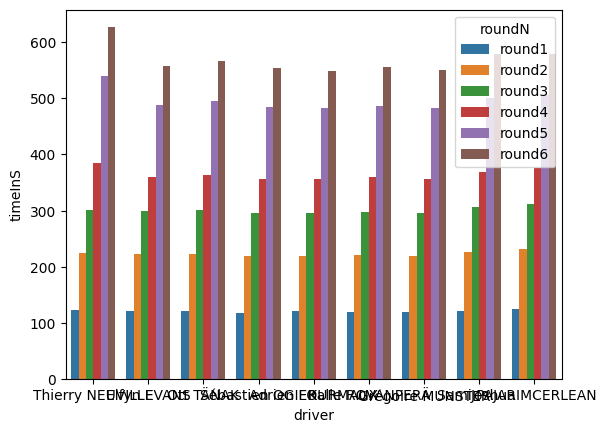

In [ ]:
from seaborn import barplot

barplot(ll, hue="roundN", y="timeInS", x="driver")

In [ ]:
ll2 = ll.pivot(index="carNo", columns="roundN", values="timeInS").reset_index()
lw = wrc.rebaseManyTimes(
    ll2, "#16", "carNo", [c for c in ll2.columns if c.startswith("round")]
)
from pandas import melt

melt(
    lw,
    id_vars=["carNo"],
    value_vars=[c for c in ll2.columns if c.startswith("round")],
    var_name="round",
    value_name="score",
)

,carNo,round,score
0,#1,round1,1.9
1,#13,round1,-1.0
2,#16,round1,0.0
3,#17,round1,-2.1
4,#33,round1,0.7
5,#5,round1,1.6
6,#55,round1,5.0
7,#69,round1,-0.9
8,#8,round1,0.1
9,#1,round2,4.3


In [17]:
xx = wrc.getStageTimes(stageId="SS1")
from wrc_rallydj.livetiming_api import time_to_seconds

xx["Gap"] = xx["diffFirst"].apply(time_to_seconds, retzero=True)
xx["Diff"] = xx["diffPrev"].apply(time_to_seconds, retzero=True)
xx["timeInS"] = xx["stageTime"].apply(time_to_seconds, retzero=True)
stage_times = xx[["pos", "carNo", "driver", "stageTime", "timeInS", "Gap", "Diff"]]
stage_times.head()

,pos,carNo,driver,stageTime,Time,Gap,Diff
0,1,#17,Sébastien OGIER,11:30.4,690.4,0.0,0.0
1,2,#33,Elfyn EVANS,11:34.3,694.3,3.9,3.9
2,3,#1,Thierry NEUVILLE,11:34.8,694.8,4.4,0.5
3,4,#16,Adrien FOURMAUX,11:41.2,701.2,10.8,6.4
4,5,#8,Ott TÄNAK,11:43.9,703.9,13.5,2.7


In [ ]:



def XrebaseTimes(times, rebaseId=None, idCol=None, rebaseCol=None):
    """Rebase times based on the time for a particular vehicle."""
    if rebaseId is None or idCol is None or rebaseCol is None:
        return times

    # Fetch the reference values for the specified 'rebaseId'
    reference_values = times.loc[times[idCol] == rebaseId, rebaseCol].iloc[0]

    # If rebaseCol is a list, apply rebasing to each column in the list
    if isinstance(rebaseCol, list):
        times[rebaseCol] = times[rebaseCol].subtract(reference_values)
    else:
        # Single column case: apply rebasing to the single column
        times[rebaseCol] = times[rebaseCol] - reference_values

    return times


x1 = DataFrame(
    {"n": ["r", "s", "t"], "a": [1, 2, 3], "b": [1, 2, 3], "c": [1, 2, 3]}
)
XrebaseTimes(x1, "s", "n", ["a", "c"])

,n,a,b,c
0,r,-1,1,-1
1,s,0,2,0
2,t,1,3,1


In [ ]:
# stage_times.loc[:,"Gap"]=wrc.rebaseTimes(stage_times, "#33", "carNo", "Gap")
wrc.rebaseTimes(stage_times, "#33", "carNo", "Gap", True)
# stage_times

TypeError: WRCAPIClient.rebaseTimes() takes from 1 to 4 positional arguments but 5 were given

In [15]:
stage_times.style.format(precision=1).bar(
    subset=["Gap"], align="zero", color=["#5fba7d", "#d65f5f"]
).set_properties(**{"text-align": "center"})

,pos,carNo,driver,stageTime,Time,Gap,Diff
0,1,#17,Sébastien OGIER,11:30.4,690.4,-3.9,0.0
1,2,#33,Elfyn EVANS,11:34.3,694.3,0.0,3.9
2,3,#1,Thierry NEUVILLE,11:34.8,694.8,0.5,0.5
3,4,#16,Adrien FOURMAUX,11:41.2,701.2,6.9,6.4
4,5,#8,Ott TÄNAK,11:43.9,703.9,9.6,2.7
5,6,#69,Kalle ROVANPERÄ,11:46.0,706.0,11.7,2.1
6,7,#5,Sami PAJARI,11:52.9,712.9,18.6,6.9
7,8,#13,Grégoire MUNSTER,11:56.9,716.9,22.6,4.0
8,9,#55,Joshua MCERLEAN,12:26.2,746.2,51.9,29.3


In [16]:
# Pace difference
stage_dist = float(
    df_stageDetails.loc[df_stageDetails["STAGE"] == "SS1", "distance"].iloc[0]
)
stage_times["speed (km/h)"] = stage_dist / (stage_times["timeInS"] / 3600)
# Use .loc[] to modify the original DataFrame in place
stage_times["pace (s/km)"] = stage_times["timeInS"] / stage_dist
stage_times["pace diff (s/km)"] = (
    stage_times["pace (s/km)"] - stage_times.loc[0, "pace (s/km)"]
)

stage_times

/var/folders/10/8lp40z8x2hj_cch9j4rk_cpm0000gs/T/ipykernel_37383/4279020840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_times[ "speed (km/h)"] = stage_dist / (stage_times["Time"]/3600)
/var/folders/10/8lp40z8x2hj_cch9j4rk_cpm0000gs/T/ipykernel_37383/4279020840.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_times[ "pace (s/km)"] = stage_times["Time"] / stage_dist
/var/folders/10/8lp40z8x2hj_cch9j4rk_cpm0000gs/T/ipykernel_37383/4279020840.py:8: SettingWithCopyWarning: 
A value is tryi

,pos,carNo,driver,stageTime,Time,Gap,Diff,speed (km/h),pace (s/km),pace diff (s/km)
0,1,#17,Sébastien OGIER,11:30.4,690.4,-3.9,0.0,99.125145,36.317728,0.000000
1,2,#33,Elfyn EVANS,11:34.3,694.3,0.0,3.9,98.568342,36.522883,0.205155
2,3,#1,Thierry NEUVILLE,11:34.8,694.8,0.5,0.5,98.497409,36.549185,0.231457
3,4,#16,Adrien FOURMAUX,11:41.2,701.2,6.9,6.4,97.598403,36.885850,0.568122
4,5,#8,Ott TÄNAK,11:43.9,703.9,9.6,2.7,97.224038,37.027880,0.710153
5,6,#69,Kalle ROVANPERÄ,11:46.0,706.0,11.7,2.1,96.934844,37.138348,0.820621
6,7,#5,Sami PAJARI,11:52.9,712.9,18.6,6.9,95.996633,37.501315,1.183588
7,8,#13,Grégoire MUNSTER,11:56.9,716.9,22.6,4.0,95.461013,37.711731,1.394003
8,9,#55,Joshua MCERLEAN,12:26.2,746.2,51.9,29.3,91.712678,39.253025,2.935297


In [17]:
# Handle split times
sw = wrc.getSplitTimes(stageId=stages_lookup["SS1"])
split_cols = [c for c in sw.columns if c.startswith("round")]
sw[split_cols]
# If a row constains None there may be an issue with the data

,round1,round2,round3,round4,round5,round6,round7,round8
0,1:40.6,2:58.0,4:08.3,5:28.3,7:16.7,8:19.9,9:00.6,11:02.2
1,+0.9,+0.3,-0.9,+1:46.7,+1:00.5,+38.2,+2:01.0,None
2,-0.8,-1.0,-1.4,+0.1,+1.9,+4.0,+5.3,+8.4
3,-1.0,-2.1,-3.4,-3.7,-4.0,-4.4,-5.0,-4.2
4,+0.8,+0.8,+0.5,+1.8,+2.1,+3.4,+4.1,+6.1
5,-0.3,-0.1,-0.3,+2.2,+3.5,+5.1,+6.6,+10.4
6,+2.6,+4.5,+5.2,+9.0,+11.7,+14.0,+16.9,+21.2
7,+1.0,+1.3,+2.1,+5.2,+6.8,+10.7,+12.2,+17.3
8,+5.5,+9.1,+14.3,+20.4,+25.5,+33.2,+37.7,+48.3


In [18]:
# Convert to numeric
def get_splits_as_numeric(splits):
    split_cols = [c for c in splits.columns if c.startswith("round")]
    sw_actual = splits[["carNo", "stageTime"] + split_cols].copy()
    # Convert string relative times to numeric relative times
    for c in split_cols:
        sw_actual[c] = sw_actual[c].apply(time_to_seconds)

    # The original data has a stage time in the first row
    # and the delta for the other rows
    # Recreate the actual times
    sw_actual.loc[1:, split_cols] = sw_actual[split_cols][1:].add(
        sw_actual[split_cols].iloc[0]
    )
    sw_actual[f"round{len(split_cols)+1}"] = sw_actual["stageTime"].apply(
        time_to_seconds
    )
    sw_actual.drop(columns="stageTime", inplace=True)
    return sw_actual


s2 = wrc.get_splits_as_numeric(sw)
s2

,carNo,round1,round2,round3,round4,round5,round6,round7,round8,round9
0,#1,100.6,178.0,248.3,328.3,436.7,499.9,540.6,662.2,694.8
1,#33,101.5,178.3,249.2,435.0,497.2,538.1,661.6,NaN,694.3
2,#8,101.4,179.0,249.7,328.4,438.6,503.9,545.9,670.6,703.9
3,#17,101.6,180.1,251.7,332.0,440.7,504.3,545.6,666.4,690.4
4,#16,101.4,178.8,248.8,330.1,438.8,503.3,544.7,668.3,701.2
5,#69,100.9,178.1,248.6,330.5,440.2,505.0,547.2,672.6,706.0
6,#13,103.2,182.5,253.5,337.3,448.4,513.9,557.5,683.4,716.9
7,#5,101.6,179.3,250.4,333.5,443.5,510.6,552.8,679.5,712.9
8,#55,106.1,187.1,262.6,348.7,462.2,533.1,578.3,710.5,746.2


In [ ]:
def get_split_duration(df, split_cols, ret_id=True, id_col="carNo"):
    # Ensure split_cols are strings
    split_cols = [str(col) for col in split_cols]

    # Create a copy of the dataframe with selected columns
    df_ = df[split_cols].copy()

    # Calculate differences between consecutive columns
    diff_df = df_[split_cols[1:]].values - df_[split_cols[:-1]].values

    # Convert back to dataframe
    diff_df = DataFrame(diff_df, columns=split_cols[1:], index=df_.index)

    # Add first split column back
    diff_df[split_cols[0]] = df_[split_cols[0]]

    if ret_id:
        # Add entryId column
        diff_df[id_col] = df[id_col]

        # Reorder columns
        cols = [id_col] + split_cols
        return diff_df[cols]

    return diff_df

In [20]:
qw = wrc.get_split_duration(s2, [c for c in sw.columns if c.startswith("round")])
qw

,carNo,round1,round2,round3,round4,round5,round6,round7,round8
0,#1,100.6,77.4,70.3,80.0,108.4,63.2,40.7,121.6
1,#33,101.5,76.8,70.9,185.8,62.2,40.9,123.5,NaN
2,#8,101.4,77.6,70.7,78.7,110.2,65.3,42.0,124.7
3,#17,101.6,78.5,71.6,80.3,108.7,63.6,41.3,120.8
4,#16,101.4,77.4,70.0,81.3,108.7,64.5,41.4,123.6
5,#69,100.9,77.2,70.5,81.9,109.7,64.8,42.2,125.4
6,#13,103.2,79.3,71.0,83.8,111.1,65.5,43.6,125.9
7,#5,101.6,77.7,71.1,83.1,110.0,67.1,42.2,126.7
8,#55,106.1,81.0,75.5,86.1,113.5,70.9,45.2,132.2


In [ ]:
from seaborn import light_palette

cm = light_palette("green", as_cmap=True)

qw.style.background_gradient(cmap=cm)

,carNo,round1,round2,round3,round4,round5,round6,round7,round8
0,#1,100.600000,77.400000,70.300000,80.000000,108.400000,63.200000,40.700000,121.600000
1,#33,101.500000,76.800000,70.900000,185.800000,62.200000,40.900000,123.500000,nan
2,#8,101.400000,77.600000,70.700000,78.700000,110.200000,65.300000,42.000000,124.700000
3,#17,101.600000,78.500000,71.600000,80.300000,108.700000,63.600000,41.300000,120.800000
4,#16,101.400000,77.400000,70.000000,81.300000,108.700000,64.500000,41.400000,123.600000
5,#69,100.900000,77.200000,70.500000,81.900000,109.700000,64.800000,42.200000,125.400000
6,#13,103.200000,79.300000,71.000000,83.800000,111.100000,65.500000,43.600000,125.900000
7,#5,101.600000,77.700000,71.100000,83.100000,110.000000,67.100000,42.200000,126.700000
8,#55,106.100000,81.000000,75.500000,86.100000,113.500000,70.900000,45.200000,132.200000


<Axes: xlabel='Task', ylabel='Model'>

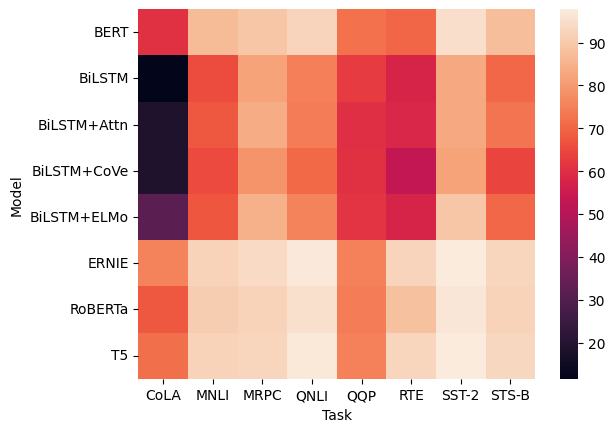

In [ ]:
from seaborn import load_dataset, heatmap

glue = load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
heatmap(glue)

/var/folders/10/8lp40z8x2hj_cch9j4rk_cpm0000gs/T/ipykernel_39077/2516911723.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gluex = pd.read_json(glue.to_json())


<Axes: >

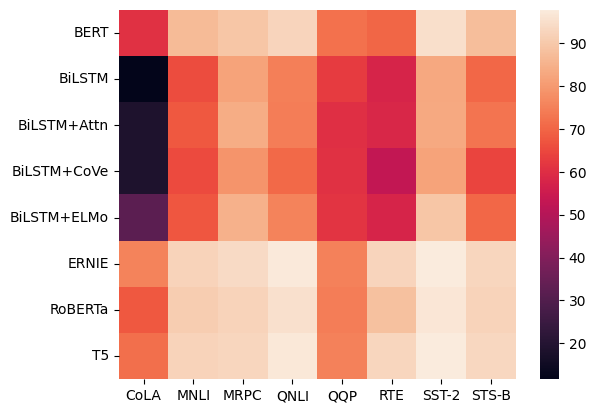

In [ ]:
from pandas import read_json

glue.to_json()
gluex = read_json(glue.to_json())
heatmap(gluex)

In [ ]:
from pandas import read_csv

read_csv(
    "Model,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B\nBERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6\nBiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3\nBiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8\nBiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4\nBiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3\nERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0\nRoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2\nT5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1\n"
)

OSError: [Errno 63] File name too long: 'Model,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B\nBERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6\nBiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3\nBiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8\nBiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4\nBiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3\nERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0\nRoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2\nT5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1\n'